# Retail
Project 3  

## DESCRIPTION

### Problem Statement

It is a critical requirement for business to understand the value derived from a customer. RFM is a method used for analyzing customer value.

Customer segmentation is the practice of segregating the customer base into groups of individuals based on some common characteristics such as age, gender, interests, and spending habits

Perform customer segmentation using RFM analysis. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value).

### Dataset Description

This is a transnational data set which contains all the transactions that occurred between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique and all-occasion gifts.


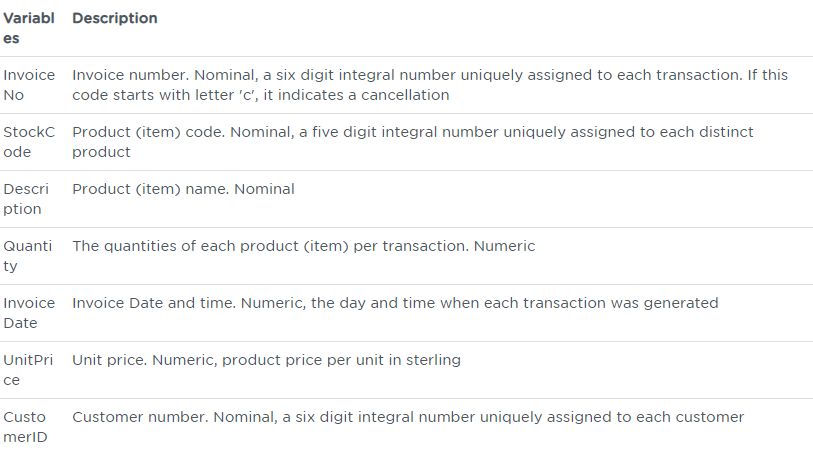

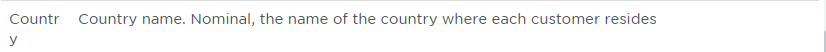

#### Project Task: Week 1

###### Data Cleaning:

1. Perform a preliminary data inspection and data cleaning.

a. Check for missing data and formulate an apt strategy to treat them.

b. Remove duplicate data records.

c. Perform descriptive analytics on the given data.

Data Transformation:

2. Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts.

a. Create month cohorts and analyze active customers for each cohort.

b. Analyze the retention rate of customers.

In [1]:
import pandas as pd
import numpy as np

In [2]:
Retail_dat_df = pd.read_excel(r"C:\Users\NITHIN\Documents\C-Project\Data-Science-Capstone-Projects-master\Project-3-datasets\train.xlsx")

In [3]:
Retail_dat_df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,NaN,United Kingdom
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom


In [4]:
Retail_dat_df.shape

(379336, 8)

In [5]:
# Check for null values

Retail_dat_df.isnull().sum()


InvoiceNo          0
StockCode          0
Description      963
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     94260
Country            0
dtype: int64

In [6]:
#View Null values in 'customer ID'
Retail_dat_df[Retail_dat_df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,NaN,United Kingdom
6,561513,72351B,SET/6 PINK BUTTERFLY T-LIGHTS,1,2011-07-27 15:12:00,4.13,NaN,United Kingdom
8,564516,84970l,SINGLE HEART ZINC T-LIGHT HOLDER,3,2011-08-25 14:45:00,2.08,NaN,United Kingdom
11,571931,21286,RETROSPOT CANDLE LARGE,2,2011-10-19 16:59:00,4.96,NaN,United Kingdom
21,547788,21398,RED POLKADOT COFFEE MUG,6,2011-03-25 12:00:00,1.63,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
379314,562420,22992,REVOLVER WOODEN RULER,1,2011-08-04 16:38:00,4.13,NaN,United Kingdom
379319,560245,21770,OPEN CLOSED METAL SIGN,1,2011-07-17 12:15:00,4.95,NaN,Switzerland
379326,538071,22310,IVORY KNITTED MUG COSY,2,2010-12-09 14:09:00,3.36,NaN,United Kingdom
379329,546891,20707,CRAZY DAISY HEART DECORATION,6,2011-03-17 18:18:00,0.83,NaN,United Kingdom


In [7]:
#View Null values in 'Description'
Retail_dat_df[Retail_dat_df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1099,544321,16033,NaN,120,2011-02-17 15:42:00,0.0,NaN,United Kingdom
1292,542505,79063D,NaN,2560,2011-01-28 12:04:00,0.0,NaN,United Kingdom
1894,540696,84562A,NaN,1,2011-01-11 09:14:00,0.0,NaN,United Kingdom
2099,542394,84452,NaN,65,2011-01-27 15:11:00,0.0,NaN,United Kingdom
2630,551430,20966,NaN,-3,2011-04-28 15:06:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
377416,542515,35607A,NaN,1,2011-01-28 12:08:00,0.0,NaN,United Kingdom
377467,542391,84455,NaN,-31,2011-01-27 14:54:00,0.0,NaN,United Kingdom
378929,542532,DCGS0074,NaN,-1,2011-01-28 13:09:00,0.0,NaN,United Kingdom
378991,565369,37342,NaN,1,2011-09-02 15:02:00,0.0,NaN,United Kingdom


In [8]:
# Percentage of missing values in train set

miss_Value_list_train=Retail_dat_df.isnull().sum() *100/len(Retail_dat_df)

In [9]:
# Create a dataframe with column name as 'Percentage Of Missing Values'

miss_Value_list_train=pd.DataFrame(miss_Value_list_train,columns=['Percentage Of Missing Values'])

In [10]:
# Sort Values in dataframe

miss_Value_list_train.sort_values(by=['Percentage Of Missing Values'],inplace=True,ascending=False)

In [11]:
# View the missing value percentage of all columns.
miss_Value_list_train[miss_Value_list_train['Percentage Of Missing Values'] >=0][:]

,Percentage Of Missing Values
CustomerID,24.848683
Description,0.253865
InvoiceNo,0.000000
StockCode,0.000000
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
Country,0.000000


In [12]:
# View the number of unique "CustomerID"s
Retail_dat_df['CustomerID'].nunique(dropna=True)

4353

In [13]:
# View the number of unique "Description"s
Retail_dat_df['Description'].nunique(dropna=True)

4132

In [14]:
Retail_dat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379336 entries, 0 to 379335
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    379336 non-null  object        
 1   StockCode    379336 non-null  object        
 2   Description  378373 non-null  object        
 3   Quantity     379336 non-null  int64         
 4   InvoiceDate  379336 non-null  datetime64[ns]
 5   UnitPrice    379336 non-null  float64       
 6   CustomerID   285076 non-null  float64       
 7   Country      379336 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 23.2+ MB


#####  Majority of Customer country wise

In [15]:
c=pd.DataFrame(Retail_dat_df.groupby('Country')['CustomerID'].nunique())


In [16]:

customercoutrywise=pd.DataFrame(c).sort_values(by='CustomerID', ascending=False)

In [17]:

customercoutrywise

,CustomerID
Country,
United Kingdom,3932
Germany,95
France,87
Spain,31
Belgium,25
Switzerland,21
Portugal,19
Italy,14
Finland,12


In [18]:
# Find the percentage of customers ordered more than one item.
n_orders = Retail_dat_df.groupby(['CustomerID'])['InvoiceNo'].nunique()
mult_orders_perc = np.sum(n_orders > 1) / Retail_dat_df['CustomerID'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than one item.')

68.64% of customers ordered more than one item.


In [19]:
import seaborn as sns

C:\Users\NITHIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of number of orders per customer'),
 Text(0.5, 0, '# of orders'),
 Text(0, 0.5, '# of customers')]

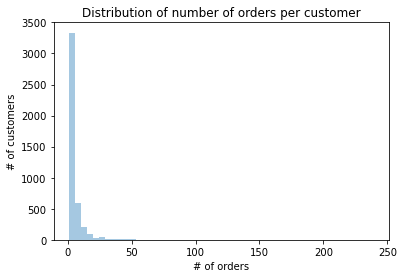

In [20]:
ax = sns.distplot(n_orders, kde=False, hist=True)
ax.set(title='Distribution of number of orders per customer',
       xlabel='# of orders', 
       ylabel='# of customers')

###### Data Transformation

###### Cohort Analysis

In [21]:
Retail_dat_df['order_month'] = Retail_dat_df['InvoiceDate'].dt.to_period('M')

In [22]:
Retail_dat_df['order_month']

0         2011-07
1         2011-06
2         2011-05
3         2011-01
4         2010-12
           ...   
379331    2011-05
379332    2010-12
379333    2011-10
379334    2011-07
379335    2011-11
Name: order_month, Length: 379336, dtype: period[M]

In [23]:
# Monthly cohorts 
Retail_dat_df['cohort'] = Retail_dat_df.groupby('CustomerID')['InvoiceDate'] \
                 .transform('min') \
                 .dt.to_period('M')

In [24]:
df_cohort=pd.DataFrame(Retail_dat_df.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('CustomerID', 'nunique')) \
              .reset_index(drop=False))

###### Active customer each Cohort

In [25]:
from operator import attrgetter

In [26]:
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
df_cohort

,cohort,order_month,n_customers,period_number
0,2010-12,2010-12,929,0
1,2010-12,2011-01,350,1
2,2010-12,2011-02,297,2
3,2010-12,2011-03,353,3
4,2010-12,2011-04,332,4
...,...,...,...,...
86,2011-10,2011-11,91,1
87,2011-10,2011-12,45,2
88,2011-11,2011-11,323,0
89,2011-11,2011-12,41,1


In [27]:

cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,929.0,350.0,297.0,353.0,332.0,367.0,351.0,322.0,325.0,361.0,344.0,460.0,248.0
2011-01,422.0,102.0,120.0,104.0,141.0,122.0,113.0,109.0,132.0,148.0,157.0,66.0,NaN
2011-02,377.0,91.0,72.0,101.0,102.0,91.0,95.0,101.0,97.0,117.0,32.0,NaN,NaN
2011-03,441.0,81.0,110.0,93.0,101.0,76.0,113.0,103.0,125.0,37.0,NaN,NaN,NaN
2011-04,298.0,67.0,65.0,60.0,61.0,71.0,69.0,78.0,23.0,NaN,NaN,NaN,NaN
2011-05,278.0,60.0,48.0,48.0,59.0,69.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,238.0,46.0,43.0,62.0,57.0,80.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,192.0,39.0,38.0,45.0,55.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,166.0,38.0,41.0,41.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

In [29]:

retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,1.0,0.376749,0.319699,0.379978,0.357374,0.395048,0.377826,0.346609,0.349839,0.388590,0.370291,0.495156,0.266954
2011-01,1.0,0.241706,0.284360,0.246445,0.334123,0.289100,0.267773,0.258294,0.312796,0.350711,0.372038,0.156398,NaN
2011-02,1.0,0.241379,0.190981,0.267905,0.270557,0.241379,0.251989,0.267905,0.257294,0.310345,0.084881,NaN,NaN
2011-03,1.0,0.183673,0.249433,0.210884,0.229025,0.172336,0.256236,0.233560,0.283447,0.083900,NaN,NaN,NaN
2011-04,1.0,0.224832,0.218121,0.201342,0.204698,0.238255,0.231544,0.261745,0.077181,NaN,NaN,NaN,NaN
2011-05,1.0,0.215827,0.172662,0.172662,0.212230,0.248201,0.266187,0.104317,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.193277,0.180672,0.260504,0.239496,0.336134,0.105042,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.203125,0.197917,0.234375,0.286458,0.109375,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.228916,0.246988,0.246988,0.138554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

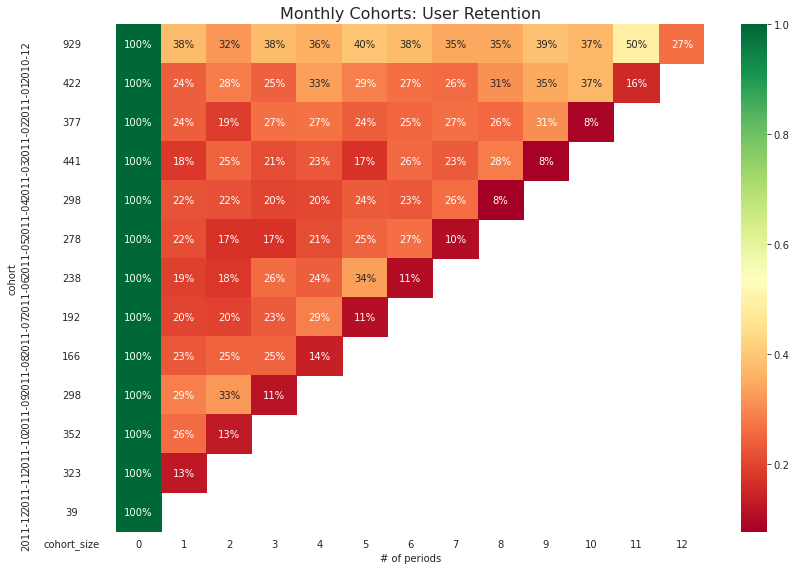

In [31]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
     # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')
    
     # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

## Datacamp

In [32]:

data = Retail_dat_df[pd.notnull(Retail_dat_df['CustomerID'])]

In [33]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_month,cohort
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,2011-06,2011-02
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,2011-05,2010-12
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,2011-01,2010-12
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,2010-12,2010-12
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,2011-05,2011-02


In [34]:
filtered_data=Retail_dat_df[['Country','CustomerID']].drop_duplicates()

<AxesSubplot:>

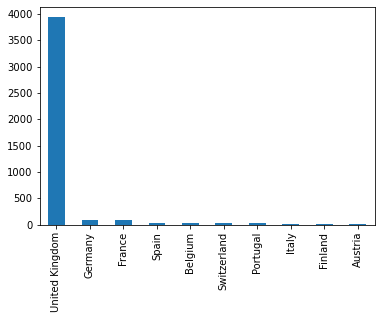

In [35]:
#Top ten country's customer
filtered_data.Country.value_counts()[:10].plot(kind='bar')

In [36]:
uk_data=Retail_dat_df[Retail_dat_df.Country=='United Kingdom']

In [37]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346854 entries, 0 to 379335
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    346854 non-null  object        
 1   StockCode    346854 non-null  object        
 2   Description  345891 non-null  object        
 3   Quantity     346854 non-null  int64         
 4   InvoiceDate  346854 non-null  datetime64[ns]
 5   UnitPrice    346854 non-null  float64       
 6   CustomerID   253664 non-null  float64       
 7   Country      346854 non-null  object        
 8   order_month  346854 non-null  period[M]     
 9   cohort       253664 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(1), object(4), period[M](2)
memory usage: 29.1+ MB


In [38]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,346854.000000,346854.000000,253664.000000
mean,8.589150,4.579735,15547.569604
std,270.524865,108.563010,1593.386045
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14194.000000
50%,3.000000,2.100000,15514.000000
75%,10.000000,4.130000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [39]:
uk_data = uk_data[(uk_data['Quantity']>0)]
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340486 entries, 0 to 379335
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    340486 non-null  object        
 1   StockCode    340486 non-null  object        
 2   Description  340097 non-null  object        
 3   Quantity     340486 non-null  int64         
 4   InvoiceDate  340486 non-null  datetime64[ns]
 5   UnitPrice    340486 non-null  float64       
 6   CustomerID   248423 non-null  float64       
 7   Country      340486 non-null  object        
 8   order_month  340486 non-null  period[M]     
 9   cohort       248423 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(1), object(4), period[M](2)
memory usage: 28.6+ MB


In [40]:
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [41]:
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['UnitPrice']

In [42]:
uk_data['InvoiceDate'].min(),uk_data['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

In [43]:
import datetime as dt

In [44]:
PRESENT = dt.datetime(2011,12,10)
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

In [45]:
uk_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,NaN,2011-07-04 16:18:00,558904,1,1.25,1.25
1,16126.0,2011-06-08 14:57:00,556072,8,3.75,30.00
2,18118.0,2011-05-04 10:58:00,551739,2,2.55,5.10
3,15529.0,2011-01-20 12:16:00,541658,1,0.85,0.85
4,14448.0,2010-12-10 17:26:00,538364,10,1.95,19.50


<b>RFM Analysis:</b>

In [46]:
rfm= uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})

In [47]:
rfm.columns

Index(['InvoiceDate', 'InvoiceNo', 'TotalPrice'], dtype='object')

In [48]:
# Change the name of columns
rfm.columns=['monetary','frequency','recency']

In [49]:
rfm['recency'] = rfm['recency'].astype(int)

In [50]:
rfm.head()

,monetary,frequency,recency
CustomerID,,,
12346.0,325,1,77183
12747.0,2,72,3138
12748.0,0,3197,22325
12749.0,3,141,3018
12820.0,3,39,629


In [51]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])

In [52]:
rfm.head()

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,1,77183,4,4,1
12747.0,2,72,3138,4,1,4
12748.0,0,3197,22325,4,1,4
12749.0,3,141,3018,4,1,4
12820.0,3,39,629,3,2,4


In [53]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183,4,4,1,441
12747.0,2,72,3138,4,1,4,414
12748.0,0,3197,22325,4,1,4,414
12749.0,3,141,3018,4,1,4,414
12820.0,3,39,629,3,2,4,324


In [54]:
# Filter out Top/Best cusotmers
rfm[rfm['RFM_Score']=='111'].sort_values('monetary', ascending=False).head()

,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,


#### Project Task: Week 2

###### Data Modeling :

1. Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.

2. Calculate RFM metrics.

3. Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.

b1. Combine three ratings to get a RFM segment (as strings).

b2. Get the RFM score by adding up the three ratings.

b3. Analyze the RFM segments by summarizing them and comment on the findings.

Note: Rate “recency" for customer who has been active more recently higher than the less recent customer, because each company wants its customers to be recent.

Note: Rate “frequency" and “monetary" higher, because the company wants the customer to visit more often and spend more money

In [55]:
Retail_dat_df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

Latest Date is 2011-12-09 so in order to calculate recency we will use 2011-12-10

<b>RFM metrics:</b>

In [56]:
latestdate = dt.datetime(2011,12,10)

# Create table 
rfmtable=Retail_dat_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (latestdate - x.max()).days, 'InvoiceNo': lambda x: len(x),'UnitPrice': lambda x: x.sum()})

#Renaming columns
rfmtable=rfmtable.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'UnitPrice': 'monetary_value'})
rfmtable

,recency,frequency,monetary_value
CustomerID,,,
12346.0,325,2,2.08
12347.0,2,132,348.31
12348.0,75,20,129.66
12349.0,18,50,540.41
12350.0,310,11,18.40
...,...,...,...
18280.0,277,5,19.75
18281.0,180,5,37.29
18282.0,7,9,44.01


##### RFM segments

Quantile

In [57]:
quantiles = rfmtable.quantile(q=[0.25,0.5,0.75])
quantiles.to_dict()

{'recency': {0.25: 17.0, 0.5: 50.0, 0.75: 144.0},
 'frequency': {0.25: 12.0, 0.5: 29.0, 0.75: 72.0},
 'monetary_value': {0.25: 36.3, 0.5: 92.08, 0.75: 211.41999999999996}}

In [58]:
segmented_rfm = rfmtable

Recency must be low

In [61]:
def recencyscore(x,p,d):
    if x <=d[p][0.25]:
        return 1
    elif x <=d[p][0.50]:
        return 2
    elif x <=d[p][0.75]:
        return 3
    else :
        return 4
    
def fmscore(x,p,d):
    if x <=d[p][0.25]:
        return 4
    elif x <=d[p][0.50]:
        return 3
    elif x <=d[p][0.75]:
        return 2
    else :
        return 1    

In [62]:
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(recencyscore, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(fmscore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(fmscore, args=('monetary_value',quantiles,))

In [63]:

segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,2,2.08,4,4,4
12347.0,2,132,348.31,1,1,1
12348.0,75,20,129.66,3,3,2
12349.0,18,50,540.41,2,2,1
12350.0,310,11,18.40,4,4,4


In [64]:
# Writing the rfm data into a new csv file
segmented_rfm.to_csv('SegmentedRFM.csv')
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str)+segmented_rfm.f_quartile.map(str)+segmented_rfm.m_quartile.map(str)

segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
12346.0,325,2,2.08,4,4,4,444
12347.0,2,132,348.31,1,1,1,111
12348.0,75,20,129.66,3,3,2,332
12349.0,18,50,540.41,2,2,1,221
12350.0,310,11,18.40,4,4,4,444


##### Customer Segementation according to RFM

In [65]:
pd.set_option("display.max_colwidth", 10000)
data = {'Customer Segement':['Best Customers', 'Loyal Customers', 'Big Spender', 'Almost Lost','Lost Customers','Lost Cheap Customers'], 'RFM':['111', 'X1X', 'XX1', '311','411','444'],'Desrciption':['Bought Most Recently and More Often', 'Buy Most Frequently', 'Spend The Most', 'Did not purchased for some time but purchased frequently and most','Did not purchased for some time but purchased frequently and most','Last purchased long ago,purchased few and spent little']}
pd.DataFrame(data)

,Customer Segement,RFM,Desrciption
0,Best Customers,111,Bought Most Recently and More Often
1,Loyal Customers,X1X,Buy Most Frequently
2,Big Spender,XX1,Spend The Most
3,Almost Lost,311,Did not purchased for some time but purchased frequently and most
4,Lost Customers,411,Did not purchased for some time but purchased frequently and most
5,Lost Cheap Customers,444,"Last purchased long ago,purchased few and spent little"


#### Project Task: Week 3

###### Data Modeling :

1. Create clusters using k-means clustering algorithm.

a. Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

b. Decide the optimum number of clusters to be formed.

c. Analyze these clusters and comment on the results.

In [66]:

cluster = segmented_rfm
cluster = cluster.reset_index(level=0).iloc[:,[2,3]].values

pd.DataFrame(cluster)

,0,1
0,2.0,2.08
1,132.0,348.31
2,20.0,129.66
3,50.0,540.41
4,11.0,18.40
...,...,...
4348,5.0,19.75
4349,5.0,37.29
4350,9.0,44.01
4351,535.0,870.04


In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:

sc= StandardScaler()
cluster = sc.fit_transform(cluster)

C:\Users\NITHIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

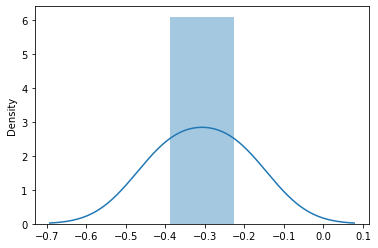

In [70]:

sns.distplot(cluster[0])

C:\Users\NITHIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

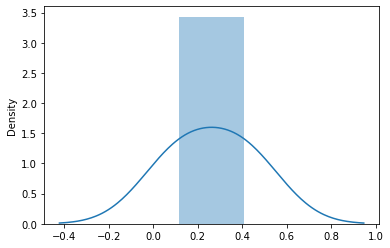

In [71]:
sns.distplot(cluster[1])

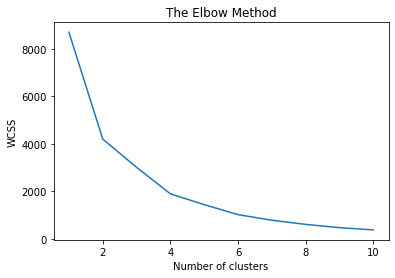

In [72]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(cluster)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

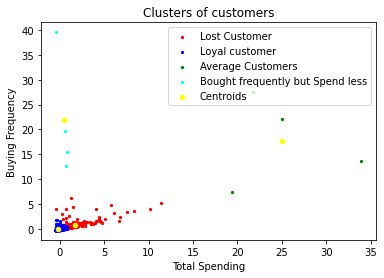

In [73]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
y_kmeans = kmeans.fit_predict(cluster)
plt.scatter(cluster[y_kmeans == 0, 0], cluster[y_kmeans == 0, 1], s = 5, c = 'red', label = 'Lost Customer')
plt.scatter(cluster[y_kmeans == 1, 0], cluster[y_kmeans == 1, 1], s = 5, c = 'blue', label = 'Loyal customer')
plt.scatter(cluster[y_kmeans == 2, 0], cluster[y_kmeans == 2, 1], s = 5, c = 'green', label = 'Average Customers')
plt.scatter(cluster[y_kmeans == 3, 0], cluster[y_kmeans == 3, 1], s = 5, c = 'cyan', label = 'Bought frequently but Spend less')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 20, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Total Spending')
plt.ylabel('Buying Frequency')
plt.legend()
plt.show()

#### Project Task: Week 4

###### Data Reporting:​​​​​​​

1. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a. Country-wise analysis to demonstrate average spend. Use a bar chart to show the monthly figures

b. Bar graph of top 15 products which are mostly ordered by the users to show the number of products sold

c. Bar graph to show the count of orders vs. hours throughout the day

d. Plot the distribution of RFM values using histogram and frequency charts

e. Plot error (cost) vs. number of clusters selected

f. Visualize to compare the RFM values of the clusters using heatmap